# Investigation of the FBI NICS Firearm Background Check Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Final Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook I will analyse the FBI NICS Firearm Background Check Data (https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md).

The data is collected from the FBI's National Instant Criminal Background Check System (https://www.fbi.gov/services/cjis/nics).

As described in the github repository the data has some caveats. For example a one-to-one correlation cannot be made between a firearm background check and a firearm sale and the background checks laws are not the same in each state.

In this code there are some Erros regarding 'chained indexing' with the SettingWithCopy warning. I looked into the documentation at it seems to be a bug that is trying to catch those erros even when there is no chained indexing in the DataFrame.

<b>Questions:</b>
1. What is the overall trend of background checks?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?
4. Which state has the most gun purchases?
5. What is the gun sale per capita ratio?

In [1]:
# relevant imports with direct plotting in matplotlib with higher resolution 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import to prevent an error in ploting with pandas index (error shows when I used the index as the x-axis)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
data = pd.read_excel('ncis-and-census-data/gun_data.xlsx')

In [4]:
data.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
data.tail(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [6]:
data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [8]:
# we will need the census data for question 5 
census_data = pd.read_csv('ncis-and-census-data/U.S. Census Data.csv')

In [9]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Structure of the data:
NICS Firearm Background Check Data:
- The background check data split across the columns with the last column beeing the total number of background checks 
- Across the rows are the states for each month in a year from november 1998 till september 2017
- For the year 1998 there are only two months worth of data

U.S. Census Data:
- The data shows differnet population parameters for each state 
- To answer question 5 we are only interested in the first row (Population estimates, July 1, 2016)

### Cleaning steps
To answer the stated questions three things are important to do with the data:
1. transform the month column in DateTimeIndex (NICS)
2. identifiy important columns and drop the unimportant ones (NICS)
3. drop the rows before 1999, because there are only two months in 1998 (NICS)
4. make pivots to compare states (NICS)
5. make groupbys to analyze the date (per year, month and total) (NICS) 
6. drop unrelevant rows and columns from (census data)

<b>1. transform the month column in DateTimeIndex</b>

In [10]:
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.set_index('month', inplace=True)

In [11]:
data

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408


<b>2. identifiy important columns and drop the unimportant ones:</b>
- state -> relevant for comparisons
- handgun -> relevant for calculating gun sales
- long_gun -> relevant for calculating gun sales
- multiple -> relevant for calculating gun sales
- totals -> relevant to describe total background checks

In [12]:
gun_data = data[['state', 'handgun', 'long_gun', 'multiple', 'totals']]

In [13]:
gun_data

,state,handgun,long_gun,multiple,totals
month,,,,,
2017-09-01,Alabama,5734.0,6320.0,317,32019
2017-09-01,Alaska,2320.0,2930.0,160,6303
2017-09-01,Arizona,11063.0,7946.0,631,28394
2017-09-01,Arkansas,4347.0,6063.0,366,17747
2017-09-01,California,37165.0,24581.0,0,123506
...,...,...,...,...,...
1998-11-01,Virginia,14.0,2.0,8,24
1998-11-01,Washington,65.0,286.0,8,361
1998-11-01,West Virginia,149.0,251.0,5,408


In [14]:
#check for null values
gun_data.isnull().sum()

state        0
handgun     20
long_gun    19
multiple     0
totals       0
dtype: int64

In [15]:
gun_data.loc[gun_data['handgun'].isnull()] #https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column

,state,handgun,long_gun,multiple,totals
month,,,,,
2005-10-01,Virgin Islands,NaN,NaN,0,0
2005-09-01,Virgin Islands,NaN,NaN,0,0
2005-08-01,Virgin Islands,NaN,NaN,0,0
2005-07-01,Virgin Islands,NaN,NaN,0,0
2005-06-01,Virgin Islands,NaN,NaN,0,0
2005-05-01,Virgin Islands,NaN,NaN,0,0
2005-04-01,Virgin Islands,NaN,1.0,0,1
2005-03-01,Virgin Islands,NaN,NaN,0,0
2005-02-01,Virgin Islands,NaN,NaN,0,0


In [16]:
gun_data.loc[gun_data['long_gun'].isnull()]

,state,handgun,long_gun,multiple,totals
month,,,,,
2005-10-01,Virgin Islands,NaN,NaN,0,0
2005-09-01,Virgin Islands,NaN,NaN,0,0
2005-08-01,Virgin Islands,NaN,NaN,0,0
2005-07-01,Virgin Islands,NaN,NaN,0,0
2005-06-01,Virgin Islands,NaN,NaN,0,0
2005-05-01,Virgin Islands,NaN,NaN,0,0
2005-03-01,Virgin Islands,NaN,NaN,0,0
2005-02-01,Virgin Islands,NaN,NaN,0,0
2005-01-01,Virgin Islands,NaN,NaN,0,0


There are some missing values for handguns and long guns. In the next step I will fill these with zeros.

In [17]:
gun_data.fillna(0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [19]:
gun_data.isnull().sum()

state       0
handgun     0
long_gun    0
multiple    0
totals      0
dtype: int64

<b>3. drop the rows before 1999</b>

In [20]:
gun_data.groupby(by=gun_data.index)['totals'].sum()

month
1998-11-01      21176
1998-12-01     870722
1999-01-01     585974
1999-02-01     690215
1999-03-01     741687
               ...   
2017-05-01    1898840
2017-06-01    1888266
2017-07-01    1733308
2017-08-01    1896457
2017-09-01    1857226
Name: totals, Length: 227, dtype: int64

only two months for the year 1998

In [21]:
gun_data.drop(pd.DatetimeIndex(['1998-11-01', '1998-12-01']), inplace=True) 
#inspiration: https://stackoverflow.com/questions/16613187/deleting-a-row-from-a-time-indexed-dataframe

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
gun_data.groupby(by=gun_data.index)['totals'].sum()

month
1999-01-01     585974
1999-02-01     690215
1999-03-01     741687
1999-04-01     638666
1999-05-01     569220
               ...   
2017-05-01    1898840
2017-06-01    1888266
2017-07-01    1733308
2017-08-01    1896457
2017-09-01    1857226
Name: totals, Length: 225, dtype: int64

<b>4. make pivots to compare states</b>

In [23]:
# creats a pivot with the date as index, state as columns and the total background checks as values
gun_data_pivot = gun_data.pivot_table(index=gun_data.index, columns='state', values='totals')

In [24]:
gun_data_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month,,,,,,,,,,,,,,,,,,,,,
1999-01-01,18049,2278,12859,11953,56953,19503,6265,1128,1,18999,...,18473,50992,5055,1043,0,14009,8695,8260,7780,2180
1999-02-01,20583,2413,14546,15348,57471,22239,8069,1077,3,22252,...,23304,55148,5933,1668,0,16053,9383,11206,10578,2643
1999-03-01,19424,3206,14992,13720,68327,17287,7877,1314,2,23492,...,23035,54096,6021,1941,0,17193,10551,10867,14891,2776
1999-04-01,14823,3931,14575,11521,62654,11739,9111,1081,2,19219,...,17000,45727,5987,1599,0,13933,9229,9908,14936,2702
1999-05-01,14043,3278,13186,10105,61497,10605,8202,1095,1,18891,...,15515,44247,5333,1156,0,13730,9134,7361,10694,2531


<b>5. Groupbys to analyze the date (per year, month and total)</b>

In [25]:
# groupby year
gun_data_year = gun_data.groupby(by=gun_data.index.year)['totals'].sum()

In [26]:
gun_data_year = pd.DataFrame(gun_data_year) # convert series to dataframe

In [27]:
gun_data_year.head()

,totals
month,
1999,9043747
2000,8427096
2001,8820045
2002,8367069
2003,8402244


In [28]:
# groupby month, to get the mean of each month over the time period
gun_data_month_mean = gun_data.groupby(by=gun_data.index.month)['totals'].mean()

In [29]:
gun_data_month_mean = pd.DataFrame(gun_data_month_mean)

In [30]:
gun_data_month_mean.head()

,totals
month,
1,21621.391388
2,23336.324402
3,24265.958852
4,20404.376077
5,18103.540670


In [31]:
# groupby each month to get a better trend than the year to spot seasonality
gun_data_total = gun_data.groupby(by=gun_data.index)['totals'].sum()

In [32]:
gun_data_total = pd.DataFrame(gun_data_total)

In [33]:
gun_data_total.head()

,totals
month,
1999-01-01,585974
1999-02-01,690215
1999-03-01,741687
1999-04-01,638666
1999-05-01,569220


In [34]:
#make a dataframe to calculate growth rate for question 2
gun_data_growth = gun_data_pivot.groupby(by=gun_data_pivot.index.year).sum()

In [35]:
#dropping data for 2017, because it is not a full year and would skew the actual growth rate
gun_data_growth.drop(2017, axis=0, inplace=True)

In [40]:
gun_data_growth

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month,,,,,,,,,,,,,,,,,,,,,
1999,246756,43073,173548,184616,883144,257308,87209,17594,21,279700,...,264214,710025,77718,22218,0,208554,133674,134471,179340,35476
2000,221911,39959,148263,169628,794506,307512,87586,15347,17,266035,...,234673,662970,67420,20300,0,188508,134255,128258,180492,34295
2001,230187,39959,147582,166062,854569,348696,89689,16619,17,303396,...,230779,672746,67518,20657,0,196181,161380,138421,181798,34454
2002,221008,36793,142260,153424,684390,183754,93598,16388,7,288848,...,223048,664745,61710,20483,1,191789,193439,134846,173779,33585
2003,225479,37059,145719,150249,524431,181257,100567,16361,11,298181,...,219783,688275,70507,19971,0,200270,213916,131777,188594,33184
2004,229997,40504,155719,158366,548843,194191,100916,16424,14,318024,...,229401,672995,79967,19490,0,213062,203432,132846,187097,35427
2005,235873,44514,176649,164001,611022,206287,97599,17121,20,370645,...,253450,738793,88981,18607,40,221725,219559,133667,183013,37911
2006,243176,47037,204178,170129,617820,214749,97616,16698,252,411728,...,258500,770236,106653,20713,1203,238862,255387,137925,189228,42376
2007,245355,49604,192071,169824,855943,221737,116112,15912,136,426180,...,241741,783596,127051,19951,1461,241538,276156,132396,180607,42770


In [41]:
#to calculate the growth rate we need the values of first and last period
growth_first = gun_data_growth.loc[1999].values
growth_last = gun_data_growth.loc[2016].values

In [42]:
#get the states
states_growth = gun_data_growth.columns

In [43]:
#creat the DataFrame / there has to be a simpler way but I didn't found one
growth_data = pd.DataFrame(states_growth)
growth_first = pd.DataFrame(growth_first)
growth_last = pd.DataFrame(growth_last)
growth_data['growth_start'] = growth_first
growth_data['growth_end'] = growth_last

In [44]:
#lets set the state column as the index to make it cleaner
growth_data.set_index('state', inplace=True)

In [46]:
growth_data.head()

,growth_start,growth_end
state,,
Alabama,246756,616947
Alaska,43073,87647
Arizona,173548,416279
Arkansas,184616,266014
California,883144,2377167


<b>6. drop unrelevant rows and columns from U.S. census data</b>

In [47]:
census_data.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [48]:
#drop column 'Fact Note'
census_data_droped = census_data.drop('Fact Note', axis=1)

In [49]:
#make 'Fact' the index
census_data_droped.set_index('Fact', inplace=True)

In [50]:
census_data_droped.head(1)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [51]:
#extract relevnat data to create the DataFrame in the desired structure
values = census_data_droped.iloc[0].values
values = pd.DataFrame(values)
index_col = census_data_droped.columns
population_per_state = pd.DataFrame(index_col)
population_per_state['population 2016'] = values

In [52]:
#rename the first column and set it as index
population_per_state.rename(columns={0: 'state'}, inplace=True)
population_per_state.set_index('state', inplace=True)

In [54]:
population_per_state.head() 

,population 2016
state,
Alabama,"4,863,300"
Alaska,"741,894"
Arizona,"6,931,071"
Arkansas,"2,988,248"
California,"39,250,017"


the population estimates are provided as a string and are seperated by commas, we need to replace the commas and transfrom the strings into integers.

In [55]:
population_per_state = population_per_state.apply(lambda x: x.str.replace(',', '').astype(int), axis=1)
#code from here: https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float

In [56]:
population_per_state['population 2016'].dtype

dtype('int64')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the overall trend of background checks?

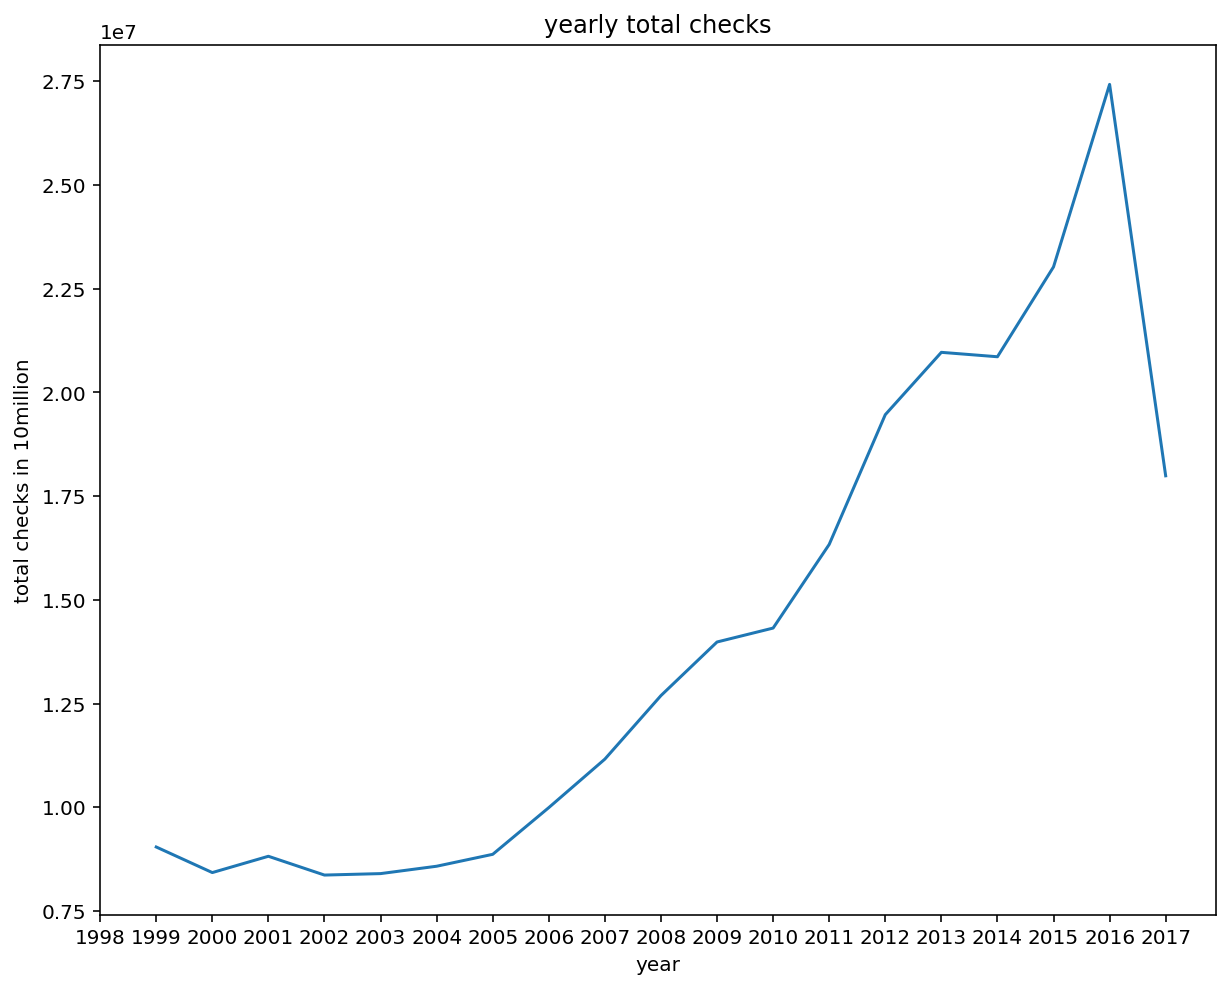

In [57]:
plt.subplots(figsize=(10,8))
plt.plot(gun_data_year.index, gun_data_year['totals'])
plt.xticks(np.arange(1998, 2018, step=1))
plt.title('yearly total checks')
plt.xlabel('year')
plt.ylabel('total checks in 10million');

Conclusion: This looks like a nice upward trend in background checks over the years with a stong decline in 2017, but this clould be due to the missing months in 2017: october, november and december. Lets see why the decline is so strong when these months are missing. To check this we will plot the mean for all background checks per month

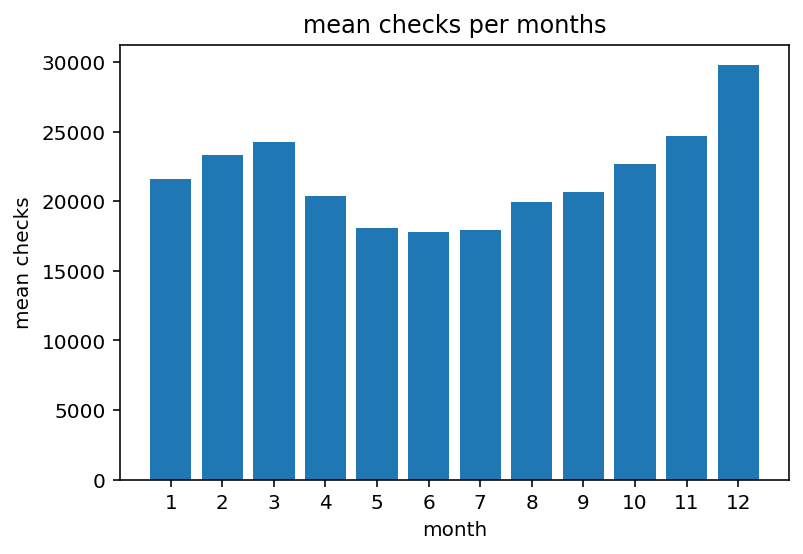

In [58]:
plt.bar(np.arange(1, 13, step=1), gun_data_month_mean['totals'])
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('month')
plt.ylabel('mean checks')
plt.title('mean checks per months');

As I suspected the missing months are relevant for the total number of checks per year. This chart also shows that there is seasonality in the data.

Conslusion:
- most checks in december and march

Possible explanation:
- new guns as presents in december 
- in march the weather gets better and people want to go shooting/hunting in the woods.

As we cannot corrleate bachground checks with gun sales these explanations are just first conclusions, later we will look at estimated gun sales from the data to check this.

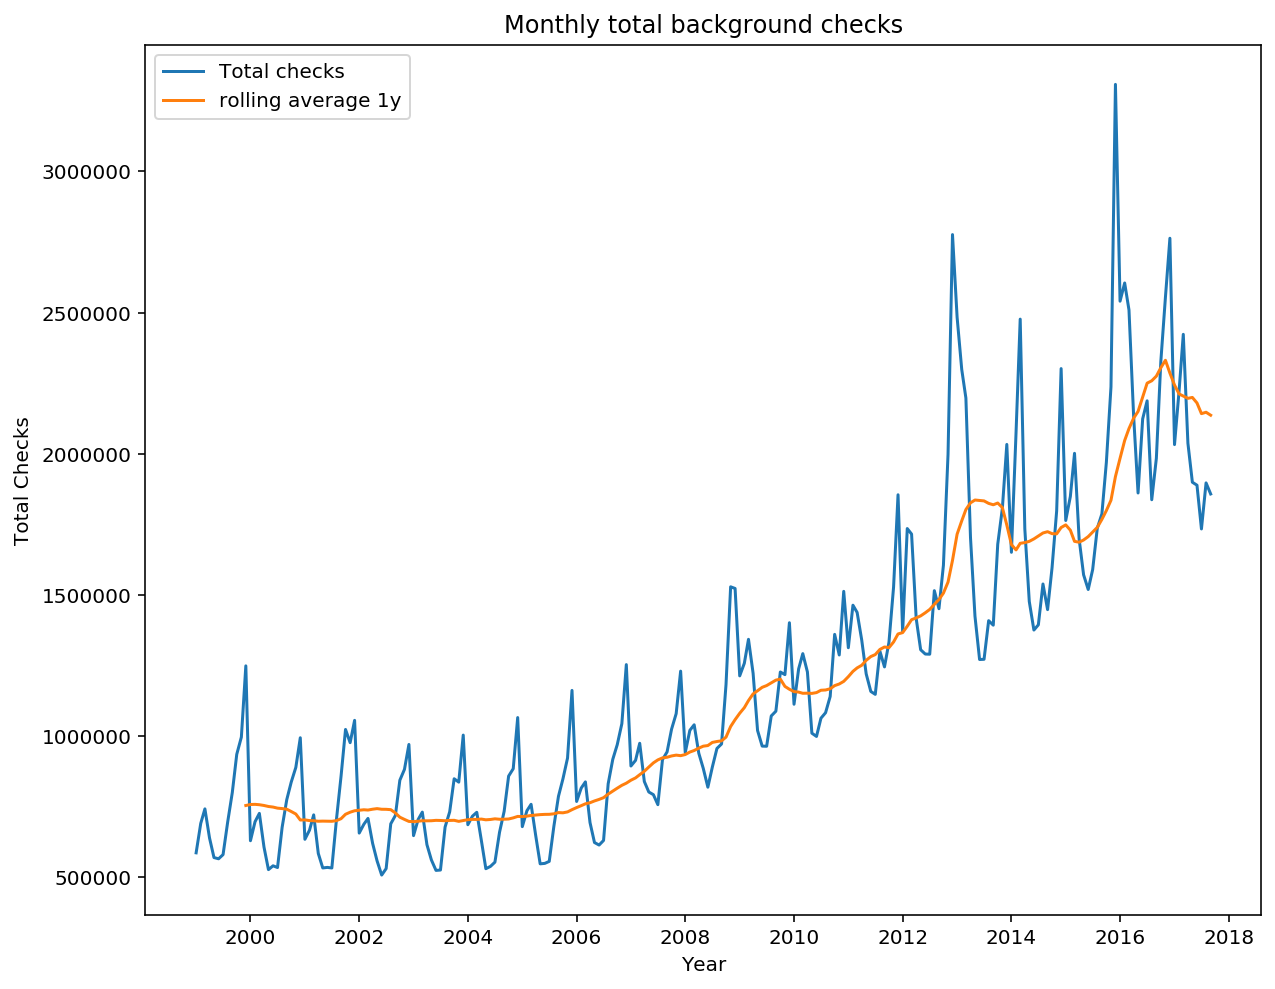

In [59]:
plt.subplots(figsize=(10,8))
plt.plot(gun_data_total.index, gun_data_total['totals'], label='Total checks')
plt.plot(gun_data_total.index, gun_data_total['totals'].rolling(window=12).mean(), label='rolling average 1y')
plt.legend()
plt.title('Monthly total background checks')
plt.xlabel('Year')
plt.ylabel('Total Checks');

This chart clearly shows the seasonality in the data, with almost the exact same spike pattern.

<b>Final Answer:</b>
the charts indicate that there is a clear upwards trend in background checks which have strong seasonality effects. I expect that this trend will be replicated in the estimated gun purchases (which is likely because gun sales are estimated from the checks so the generall trend shoud be the same)

### Research Question 2: Which states have had the highest growth in gun registrations?

to measure the growth rate I will use the CAGR (Compound Annual Growth Rate). In the data wrangling phase i cretaed a dateframe with the start and end points of the time period so we can directly calculate the CAGR with this DataFrame knowing that 17 years have passed from the first to the last datapoint.

In [60]:
growth_data['CAGR'] = growth_data.iloc[:, -1].div(growth_data.iloc[:, 0]).pow(1./17).sub(1)
# used code from https://stackoverflow.com/questions/37355924/pandas-calculate-cagr-with-slicing

In [63]:
growth_data.sort_values(by='CAGR', ascending=False, inplace=True)

In [64]:
growth_data.head()

,growth_start,growth_end,CAGR
state,,,
Virgin Islands,0,1087,inf
District of Columbia,21,875,0.245322
Kentucky,248212,3676847,0.171823
Guam,170,2123,0.160112
Massachusetts,24314,226212,0.140197


In [65]:
#drop Virgin Island
growth_data.drop('Virgin Islands', axis=0, inplace=True)

In [70]:
growth_data.head(10)

,growth_start,growth_end,CAGR
state,,,
District of Columbia,21,875,0.245322
Kentucky,248212,3676847,0.171823
Guam,170,2123,0.160112
Massachusetts,24314,226212,0.140197
Indiana,203182,1436725,0.121941
Washington,133674,713996,0.103578
Florida,279700,1435340,0.100982
New Hampshire,37711,165164,0.090768
Illinois,484848,1924070,0.084458


In [67]:
growth_data.tail()

,growth_start,growth_end,CAGR
state,,,
New Mexico,94406,161216,0.031980
Mississippi,182114,276161,0.024794
Georgia,409810,612985,0.023968
Arkansas,184616,266014,0.021719
Mariana Islands,51,17,-0.062580


In [68]:
growth_data['CAGR'].mean()

0.06299105420606041

<b>Conclusion:</b> On average backgrund checks are growing 6% over each year.The District of Columbia has the highest Compound Annual Growth Rate of 24.5%, followed by Kentucky with 17.2% and Guam with 16%. Interesting is that under the top three states are two (District of Columbia and Guam) where there were hardly any registrations in 1988. In a quick google serach (I am from Germany) I discoverd that district of Columbia, Guam and Mariana Islands aren't really sates so they shouldn't be included in the answer to the question.
This leaves us with the top three states: Kentucky, Massachusetts and Indiana. 

### Research Question 3: What is the overall trend of gun purchases?

As mentioned above there are some shortcomings when calculating the gun purchases from this dataset. But there are several who used a formular provided in the  Small Arms Survey (http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf) from Jurgen Brauer in 2013.

He used the following fromular(translated into column names): (handgun + long_gun + 2 * multiple) + 1.1

In [71]:
#calculating gun sales 
gun_data['gun_sales_estimated'] = (gun_data['handgun'] + gun_data['long_gun'] + 2*gun_data['multiple']) * 1.1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
gun_data

,state,handgun,long_gun,multiple,totals,gun_sales_estimated
month,,,,,,
2017-09-01,Alabama,5734.0,6320.0,317,32019,13956.8
2017-09-01,Alaska,2320.0,2930.0,160,6303,6127.0
2017-09-01,Arizona,11063.0,7946.0,631,28394,22298.1
2017-09-01,Arkansas,4347.0,6063.0,366,17747,12256.2
2017-09-01,California,37165.0,24581.0,0,123506,67920.6
...,...,...,...,...,...,...
1999-01-01,Virginia,6298.0,7556.0,127,14009,15518.8
1999-01-01,Washington,1891.0,5780.0,149,8695,8765.9
1999-01-01,West Virginia,2989.0,5118.0,153,8260,9254.3


In [73]:
#groupby to get the sum of all sales in a month
gun_data_sales = gun_data.groupby(by=gun_data.index)['gun_sales_estimated'].sum()

In [74]:
gun_data_sales = pd.DataFrame(gun_data_sales)

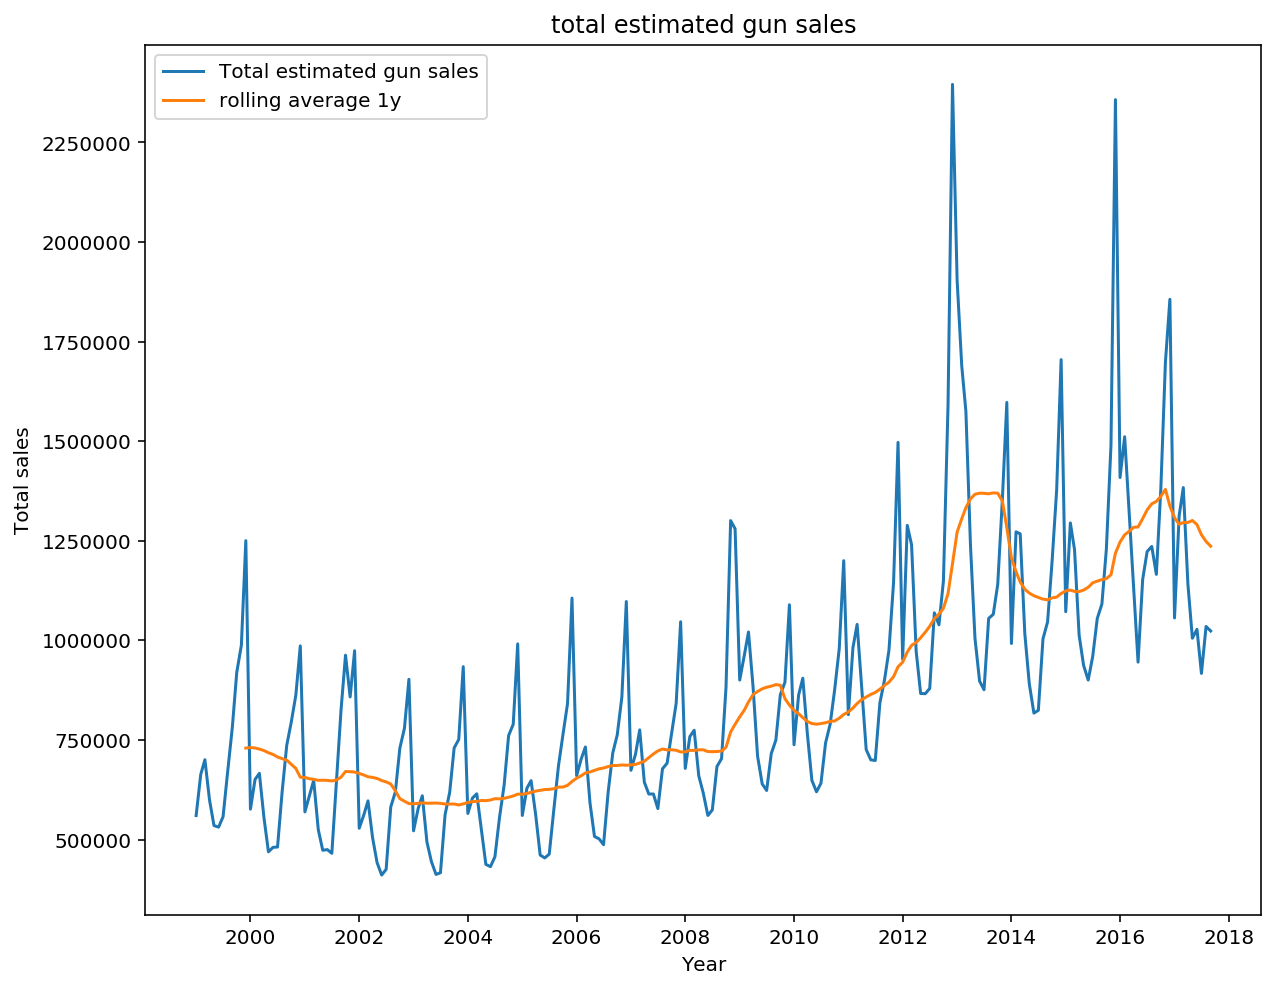

In [75]:
plt.subplots(figsize=(10,8))
plt.plot(gun_data_sales.index, gun_data_sales['gun_sales_estimated'], label='Total estimated gun sales')
plt.plot(gun_data_sales.index, gun_data_sales['gun_sales_estimated'].rolling(window=12).mean(), label='rolling average 1y')
plt.legend()
plt.title('total estimated gun sales')
plt.xlabel('Year')
plt.ylabel('Total sales');

This chart clearly shows the expected seasonality in the data, but the upward trend is not as strong as in the total background checks. In the next step I will explore the seasonality further.

In [76]:
#groupby to get the data for all the month over the years
gun_data_sales_month = gun_data.groupby(by=gun_data.index.month)['gun_sales_estimated'].mean()

In [77]:
gun_data_sales_month = pd.DataFrame(gun_data_sales_month)

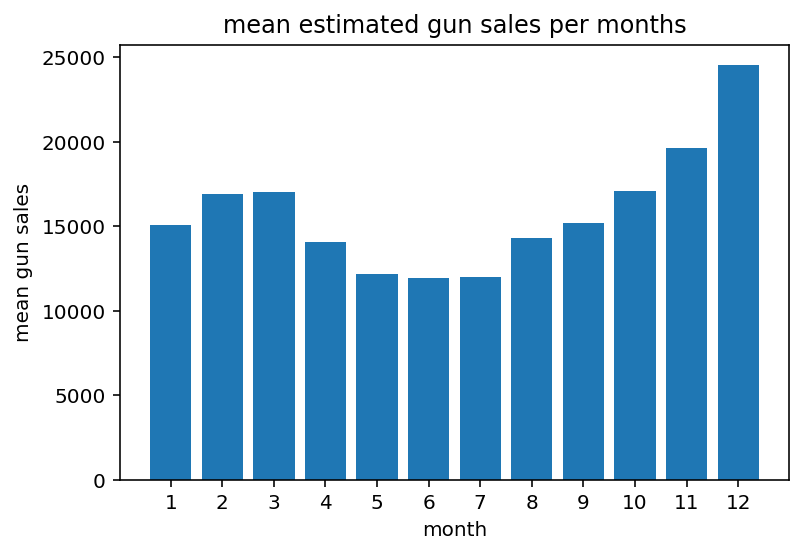

In [78]:
plt.bar(np.arange(1, 13, step=1), gun_data_sales_month['gun_sales_estimated'])
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('month')
plt.ylabel('mean gun sales')
plt.title('mean estimated gun sales per months');

This chart supporty my conclusion: people buy guns in december - most likely as presents. Now let us look at the state level and which sates have the most gun sales.

### Research Question 4: Which state has the most gun purchases?

In [79]:
#groupby to get the total sum of gun sales per state
per_state_gun_sales = gun_data.groupby(by=gun_data['state'])['gun_sales_estimated'].sum()

In [80]:
per_state_gun_sales = pd.DataFrame(per_state_gun_sales)

In [81]:
per_state_gun_sales.sort_values(by='gun_sales_estimated', ascending=False, inplace=True)

In [82]:
per_state_gun_sales.head(5)

,gun_sales_estimated
state,
Texas,16283427.6
California,13421428.9
Pennsylvania,12780953.9
Florida,11212258.2
Ohio,8539402.3


In [84]:
per_state_gun_sales.tail(10)

,gun_sales_estimated
state,
Nebraska,606928.3
Vermont,533624.3
Delaware,511210.7
Rhode Island,336684.7
Puerto Rico,215556.0
Guam,16009.4
District of Columbia,5780.5
Virgin Islands,4042.5
Mariana Islands,518.1


<b>Answer:</b> Texas has the most total gun sales over the analyzed time period with an estimated total sales of 16 Million guns. Exactly 4 states are above 10 million gun sales: Texas, California, Pennsylvania and Florida.

As we can see there are huge differences when looking at the head and the tail of overall gun sales from 1999 to 2018. But the total numbers are baised, because larger states will allways have more gun sales than smaller sates so in the next step I will take the pupulation size of each state into account. For this I will use the provided U.S. Census Dataset.

### Research Question 5: What is the gun sales per capita ratio?

to check this we will need the U.S. census data to get the population estimates. In the provided data there are only two years with the population: 2010 and 2016, so the sales per capita will be based on the year 2016.

In [85]:
# pivot gun_data to get the sales per state
gun_data_sales_pivot = gun_data.pivot_table(values='gun_sales_estimated', index=gun_data.index, columns='state')

In [86]:
gun_data_sales_pivot.head(1)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month,,,,,,,,,,,,,,,,,,,,,
1999-01-01,20098.1,2566.3,12537.8,13477.2,54606.2,21817.4,3527.7,1248.5,1.1,20343.4,...,20535.9,50707.8,5646.3,1159.4,0.0,15518.8,8765.9,9254.3,8566.8,2372.7


In [87]:
#groupby to get the aggregated sums of all for each year, since we only have the population data for 2016
gun_sales_year_state = gun_data_sales_pivot.groupby(by= gun_data_sales_pivot.index.year).sum()

In [88]:
gun_sales_year_state.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month,,,,,,,,,,,,,,,,,,,,,
1999,274946.1,48414.3,172011.4,201619.0,860213.2,289334.1,49908.1,19571.2,23.1,292213.9,...,294622.9,726075.9,86779.0,24664.2,0.0,231275.0,133926.1,150130.2,197381.8,37639.8
2000,247552.8,44982.3,149616.5,181956.5,694497.1,349746.1,13.2,17034.6,18.7,279995.1,...,261907.8,654892.7,74949.6,22514.8,0.0,209444.4,127326.1,143354.2,198660.0,35335.3
2001,248356.9,44507.1,150010.3,171948.7,680124.5,393908.9,25866.5,18472.3,18.7,324479.1,...,257645.3,649784.3,75279.6,22940.5,0.0,217873.7,140055.3,148615.5,199657.7,35741.2
2002,202101.9,36204.3,130524.9,129500.8,541688.4,205264.4,58892.9,18172.0,7.7,304945.3,...,248911.3,524466.8,68748.9,22808.5,1.1,213018.3,135760.9,118395.2,188684.1,30047.6
2003,208261.9,36544.2,123076.8,130784.5,405258.7,193865.1,60893.8,18115.9,12.1,319093.5,...,245868.7,535595.5,70781.7,22278.3,0.0,222700.5,153319.1,115116.1,204608.8,29706.6


In [89]:
#creat the DataFrame
values_year = gun_sales_year_state.loc[2016].values
values_year = pd.DataFrame(values_year)
gun_sales_2016 = gun_sales_year_state.columns.values
gun_sales_2016 = pd.DataFrame(gun_sales_2016)
gun_sales_2016['gun_sales'] = values_year

In [90]:
gun_sales_2016.set_index(0, inplace=True)

Join gun_sales_2016 with population_per_state to calculate gunsales per capita (population_per_state was created in the data wrangling phase under point 6)

In [91]:
#check the number of rows to know how to join th data
gun_sales_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 1 columns):
gun_sales    55 non-null float64
dtypes: float64(1)
memory usage: 880.0+ bytes


In [92]:
population_per_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
population 2016    50 non-null int64
dtypes: int64(1)
memory usage: 800.0+ bytes


In [93]:
# I will merge the data on an inner join since we can only estimate sales per capita where there is information about the population
sales_per_capita = gun_sales_2016.merge(population_per_state, left_on=gun_sales_2016.index, right_on=population_per_state.index, how='inner')

In [94]:
sales_per_capita.set_index('key_0', inplace=True)

In [96]:
sales_per_capita

,gun_sales,population 2016
key_0,,
Alabama,316993.6,4863300
Alaska,86911.0,741894
Arizona,320746.8,6931071
Arkansas,188280.4,2988248
California,1226395.5,39250017
Colorado,496225.4,5540545
Connecticut,182806.8,3576452
Delaware,54326.8,952065
Florida,1131706.4,20612439


In [97]:
sales_per_capita['sales per capita'] = sales_per_capita['gun_sales'] / sales_per_capita['population 2016']

In [98]:
sales_per_capita.sort_values(by='sales per capita', ascending=False, inplace=True)

In [99]:
sales_per_capita.head(5)

,gun_sales,population 2016,sales per capita
key_0,,,
Alaska,86911.0,741894,0.117147
South Dakota,99451.0,865454,0.114912
West Virginia,202174.5,1831102,0.110411
Montana,109710.7,1042520,0.105236
Wyoming,56071.4,585501,0.095767


In [100]:
sales_per_capita.tail(5)

,gun_sales,population 2016,sales per capita
key_0,,,
New York,369475.7,19745289,0.018712
Nebraska,31212.5,1907116,0.016366
New Jersey,131282.8,8944469,0.014678
Iowa,42002.4,3134693,0.013399
Hawaii,0.0,1428557,0.000000


In [101]:
sales_per_capita['sales per capita'].mean()

0.06040933309063739

In 2016, gun sales were on average 6% of the state's population, with the most highest rate in Alaska (11.7%), South Dakota(11.5%) and West Virgina (11%) an the lowest rates in New Jersey (1.5%), Iowa (1.3%) and even zero sales in Hawaii.

<a id='conclusions'></a>
## Final Conclusions



The overall trend of background cheks is positive and there is a high seasonality associated with it. Especially in december and march, which is most likely due to the holidays in december and the warmer temperatures in march. Generally there was an annual compound groth rate (CAGR) of 6% over the last 17 years in background checks (1999-2016). Looking at the estimated gun sales the expected seasonality was replicated but with higher mean gun sales in the winter months, which support my conclusion that people buy guns as presents for chtistmas. Inspecting the total gun sales in the analyzed time period (1999-2018) Texas, California, Pennsylvania and Florida had each over 10 million gun sales with the most sales in Texas (16 Million). In the last questiom I analyzed the gun sales per capota ratio in 2016. In that year Alaska, South Dakota, West Virginia and Montana had each over 10% of their popualation as gun sales, with the highest rate in Alaska where gun sales take 11.7% of the popualion.

Tha analyzed data had some limitations, which were taken care of in some aspects like the drop of unfinished years in the data, but other limitations like the gun sales estimates are still limited and should not be taken as 1:1 correlation with real gun sales. Therefore each calculation involving the estimated gun sales should be viewed critically.